# Solutions for Lab Sheet 4 (COM3502-4502-6502 Speech Processing)

This lab sheet (solution) is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-4-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [2]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

## Frequency analysis (of periodic signals)

The **[Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier "Click here to read additional information on Joseph Fourier on Wikipedia") Theorem** states that any periodic signal of frequency $f_0$ can be constructed exactly by adding together ‘sinusoids’ (sine waves) with frequencies $f_0$, $2f_0$, $3f_0$, $4f_0$, $5f_0$, etc. The segmentation of a periodic time domain signal into sinusoids is called [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis "Read additional information on Fourier Analysis on Wikipedia").

Each sinusoid in this ‘[Fourier Series](https://en.wikipedia.org/wiki/Fourier_series "Read additional information about the Fourier Series on Wikipedia")’ is characterised by its …
* frequency
* amplitude and
* phase

$f_0$ is termed the *fundamental frequency*

$2 f_0$, $3 f_0$, $4 f_0$, etc. are termed the *harmonics*

### Generating a Sawtooth Signal (Task 1)

The [sawtooth](https://en.wikipedia.org/wiki/Sawtooth_wave "Read additional information on the saw tooth signal on Wikipedia") signal in its most general form is defined as

\begin{equation}
x(t) = t - \lfloor t \rfloor \tag{1}
\end{equation}

or centered around 0 as

\begin{equation}
x(t) = 2 (t - \lfloor t \rfloor) - 1 \tag{2}
\end{equation}

The `scipy` library gives us more flexibility to generate and visualise a sawtooth signals since they can be generated as if they were sine signals. 

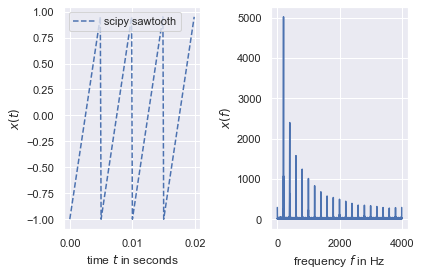

In [3]:
from scipy import signal            # for easy sawtooth signal generation
from IPython import display as ipd  # to playback audio signals

fs=8000                   # sampling frequency
t = np.arange(0, 2, 1/fs) # time vector

f = 200                   # frequency in Hz for scipy sawtooth
saw_tooth = signal.sawtooth(2 * np.pi * f * t)

# plot first 20 ms (=160 samples at sampling frequency of 8000 Hz)
plt.subplot(1,2,1)
plt.plot(t[0:160], saw_tooth[0:160], '--', label='scipy sawtooth');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

# calculate the spectum (frequency domain representation)
FFT_length = 2**15 # take a power of two which is larger than the signal length
f = np.linspace(0, fs/2, num=int(FFT_length/2+1))
spectrum = np.abs(np.fft.rfft(saw_tooth,n=FFT_length))

# plot the spectrum
plt.subplot(1,2,2)
plt.plot(f,spectrum)
plt.xlabel('frequency $f$ in Hz');plt.ylabel('$x(f)$')

plt.tight_layout() # this allowes for some space for the title text.

# playback sound file (if you want)
ipd.Audio(saw_tooth, rate=fs)

## Fourier series of Saw-tooth signal (Task 2)

The Fourier Series of a sawtooth signal is given by

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothSimple}
f(t) &=& \frac{2}{\pi}\left[\sin(\omega_0t) + \frac{\sin(2\omega_0t)}{2} + \frac{\sin(3\omega_0t)}{3} + \cdots\right]\tag{3}\\
     &=& \frac{2}{\pi} \sum_{k=1}^{\infty}\,\frac{\sin(k\omega_0t)}{k}\tag{4}
\end{eqnarray*}

with $\omega = 2 \pi f$ being the angular frequency.

The following code generates the first four sinusoids from \eqref{eq:FourierSeriesSawtoothSimple} (left panels) as well as a superposition of these resulting in a sawtooth signal (right panels). 

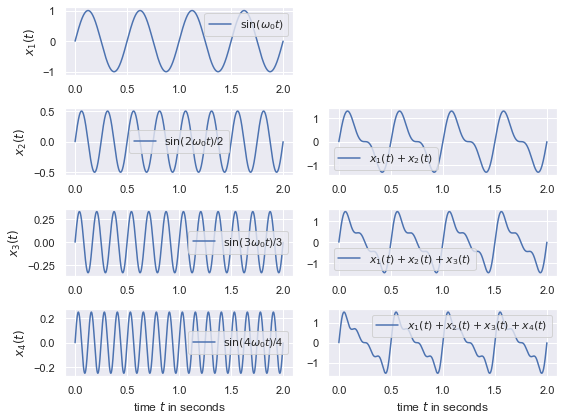

In [10]:
fs=8000 # sampling frequency

t=np.arange(0,2,1/fs) # time vector
f0=2                  # fundamental frequency in Hz

sin1=np.sin(2*np.pi*f0*t)
sin2=np.sin(2*np.pi*2*f0*t)/2
sin3=np.sin(2*np.pi*3*f0*t)/3
sin4=np.sin(2*np.pi*4*f0*t)/4

plt.figure(figsize=(8, 6))

plt.subplot(4,2,1)
plt.plot(t,sin1,label='$\mathrm{sin}(\omega_0 t$)')
plt.ylabel('$x_1(t)$')
plt.legend()

plt.subplot(4,2,3)
plt.plot(t,sin2,label='$\mathrm{sin}(2 \omega_0 t$)/2')
plt.ylabel('$x_2(t)$')
plt.legend()

plt.subplot(4,2,4)
plt.plot(t,sin1+sin2,label='$x_1(t)+x_2(t)$')
plt.legend()

plt.subplot(4,2,5)
plt.plot(t,sin3,label='$\mathrm{sin}(3 \omega_0 t$)/3')
plt.ylabel('$x_3(t)$')
plt.legend()

plt.subplot(4,2,6)
plt.plot(t,sin1+sin2+sin3,label='$x_1(t)+x_2(t)+x_3(t)$')
plt.legend()

plt.subplot(4,2,7)
plt.plot(t,sin4,label='$\mathrm{sin}(4 \omega_0 t$)/4')
plt.ylabel('$x_4(t)$')
plt.xlabel('time $t$ in seconds')
plt.legend()

plt.subplot(4,2,8)
plt.plot(t,sin1+sin2+sin3+sin4,label='$x_1(t)+x_2(t)+x_3(t)+x_4(t)$')
plt.xlabel('time $t$ in seconds')
plt.legend()

plt.tight_layout() # this allowes for some space for the title text.
None

A realisation as a function is of course more effiecient regarding code re-usability:

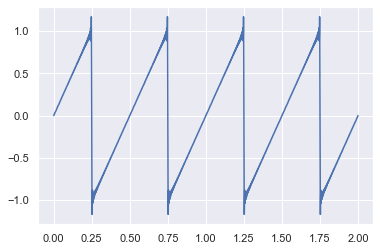

In [6]:
def generateSawTooth(f0=2, length = 2, fs=8000, order=10, height=1):
    """
    Return a saw-tooth signal with given parameters.
    
    Parameters
    ----------
    f0 : float, optional
        fundamental frequency $f_0$ of the signal to be generated,
        default: 1 Hz
    length : float, optional
        length of the signal to be generated, default: 2 sec.
    fs : float, optional
        sampling frequency $f_s$, default: 8000 Hz
    order : int, optional
        number of sinosuids to approximate saw-tooth, default: 10
    height : float, optional
        height of saw-tooth, default: 1

    Returns
    -------
    sawTooth
        generated sawtooth signal
    t
        matching time vector
    """
        
    t=np.arange(0,length,1/fs) # time vector
    sum = np.zeros(len(t))
    for ii in range(order):
        jj=ii+1
        sign = (jj % 2) * 2 - 1 # create alternating sign
        sum += sign*np.sin(2*np.pi*jj*f0*t)/jj
    return 2*height*sum/np.pi, t

signal,t = generateSawTooth(order=100)
plt.plot(t,signal);
plt.xlabel('time $t$ in seconds')

### Fourier series of (time-reversed) Saw-tooth signal (Task 3)

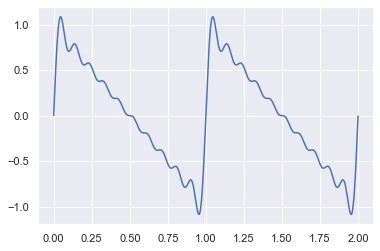

In [5]:
def generateSawTooth2(f0=1, length = 2, fs=8000, order=10):
    """
    Return a saw-tooth signal with given parameters.
    
    Parameters
    ----------
    f0 : float, optional
        fundamental frequency $f_0$ of the signal to be generated,
        default: 1 Hz
    length : float, optional
        length of the signal to be generated, default: 2 sec.
    fs : float, optional
        sampling frequency $f_s$, default: 8000 Hz
    order : int, optional
        number of sinosuids to approximate saw-tooth, default: 10

    Returns
    -------
    sawTooth
        generated sawtooth signal
    t
        matching time vector
    """
    t=np.arange(0,length,1/fs)  # time vector
    sawTooth = np.zeros(len(t)) # pre-allocate variable with zeros 
    for ii in range(order):
        jj=ii+1
        sawTooth += np.sin(2*np.pi*jj*f0*t)/jj
    return 2*sawTooth/np.pi, t

signal,t = generateSawTooth()
plt.plot(t,signal);
plt.xlabel('time $t$ in seconds')

### Fourier series of triangular wave form (Task 4)

\begin{eqnarray}
\label{eq:FourierSeriesTriangular}
f(t) &=& \frac{8h}{\pi^2}\left[\sin(\omega_0t)-\frac{1}{3^2}\sin(3\omega_0t)+\frac{1}{5^2}\sin(5\omega_0t)\mp \cdots\right] \tag{7}\\
 &=& \frac{8h}{\pi^2} \sum_{k=1}^{\infty}\,(-1)^{k-1}\frac{\sin((2k-1)\omega_0t)}{(2k-1)^2} \tag{}
\end{eqnarray}

Text(0.5, 0, 'time $t$ in seconds')

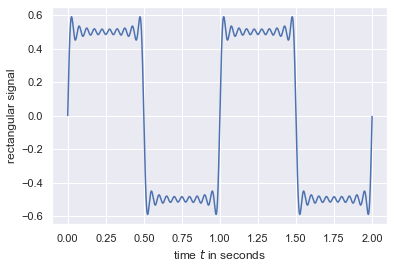

In [13]:
def generateTriangular(f0=1, length = 2, fs=8000, order=10):
    t=np.arange(0,length,1/fs)  # time vector
    triang = np.zeros(len(t)) # pre-allocate variable with zeros 
    for ii in range(0, order, 2):
        jj=ii+1
        triang += np.sin(2*np.pi*jj*f0*t)/jj
    return 2*triang/np.pi, t

signal,t = generateTriangular(order=20)
plt.plot(t,signal);
plt.ylabel('rectangular signal')
plt.xlabel('time $t$ in seconds')

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 